# 1. The dataset is highly skewed toward the cities included in Delhi-NCR. 
### So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

df represent data_india in my code

In [175]:
import pandas as pd
import numpy as np
data=pd.read_csv("zomato.csv",encoding="iso-8859-1")
df=data[data["Country Code"]==1]
# df["City"].unique()
res_delhi=(df[(df["City"]=="Gurgaon")|(df["City"]=="New Delhi")|(df["City"]=="Ghaziabad")|(df["City"]=="Noida")|
                (df["City"]=="Faridabad")] )
res_rest_india=(df[(df["City"]!="Gurgaon")&(df["City"]!="New Delhi")&(df["City"]!="Ghaziabad")&(df["City"]!="Noida")&
                (df["City"]!="Faridabad")] )

### 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

7947 705


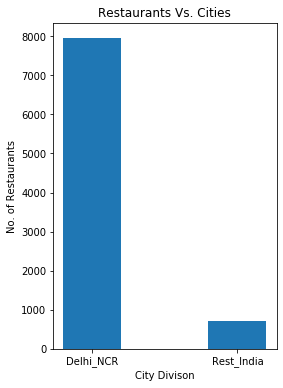

In [151]:
import matplotlib.pyplot as plt

###some restaurants can have same name as their branches, but that must  be consider as different as they will be
### at different places

Delhi_NCR=len((res_delhi["Restaurant Name"]))   
Rest_India=len((res_rest_india["Restaurant Name"]))
print(Delhi_NCR,Rest_India)
plt.figure(figsize=(4,6))
plt.bar(["Delhi_NCR","Rest_India"],[Delhi_NCR,Rest_India],width=0.4)
plt.xlabel("City Divison")
plt.ylabel("No. of Restaurants")
plt.title("Restaurants Vs. Cities")
plt.show()

### 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [153]:
## finding cuisines served in rest of india but not in delhi
cuisines_delhi=set()
for i in set(res_delhi["Cuisines"]):
    l=i.split(",")
    for j in l:
        cuisines_delhi.add(j.strip())

cuisines_rest_india=set()
for i in set(res_rest_india["Cuisines"]):
    l=i.split(",")
    for j in l:
        cuisines_rest_india.add(j.strip())


common_cuisines=cuisines_delhi.intersection(cuisines_rest_india)
final_ans=[]
for i in cuisines_rest_india:
    if i not in common_cuisines:
        final_ans.append(i) 
final_ans

['Cajun', 'German', 'Malwani', 'BBQ']

#### Checking results of 1.2 through Zomato API


In [154]:
import requests
parametres={"city_id":1}
r=requests.get("https://developers.zomato.com/api/v2.1/cuisines",params=parametres,headers={"user-key":"2ecee8e9ad3c0f0d542ec915d2506848","accept":"application/json"})
py=r.json()
l=[]
for i in py["cuisines"]:
    
    l.append(i["cuisine"]["cuisine_name"].strip())
l

['Afghan',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Armenian',
 'Asian',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Brazilian',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Cuisine Varies',
 'Desserts',
 'Ethiopian',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'Frozen Yogurt',
 'Goan',
 'Grocery',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Iranian',
 'Israeli',
 'Italian',
 'Japanese',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mishti',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Moroccan',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Odia',
 'Paan',
 'Pakistani',
 'Panini',

### 1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.


In [155]:
#### For Delhi_NCR-- cuisines and no. of restaurants serving these cuisines
all_cuisines_delhi=[]
for i in (res_delhi["Cuisines"]):
    l=i.split(",")
    for j in l:
        all_cuisines_delhi.append(j.strip())
unique,counts=np.unique(all_cuisines_delhi,return_counts=True)
# print(counts)
ind=counts.argsort()
unique=unique[ind]
counts=counts[ind]

top_cuisines_ncr=[]


for i in range(-1,-11,-1):
    top_cuisines_ncr.append([unique[i],counts[i]])
    
    print(unique[i],counts[i])

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


In [156]:
#### For Rest of India--  cuisines and no. of restaurants serving these cuisines
all_cuisines_india=[]
for i in (res_rest_india["Cuisines"]):
    l=i.split(",")
    for j in l:
        all_cuisines_india.append(j.strip())
unique,counts=np.unique(all_cuisines_india,return_counts=True)
# print(counts)
ind=counts.argsort()
unique=unique[ind]
counts=counts[ind]
top_cuisines_india=[]
for i in range(-1,-11,-1):
    top_cuisines_india.append([unique[i],counts[i]])
    print(unique[i],counts[i])

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


### 1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference

In [157]:
### ANALYSIS
cuisines_delhi=set()
for i in set(res_delhi["Cuisines"]):
    l=i.split(",")
    for j in l:
        cuisines_delhi.add(j.strip())
print("types of cuisines in delhi_ncr:",len(cuisines_delhi))
cuisines_rest_india=set()
for i in set(res_rest_india["Cuisines"]):
    l=i.split(",")
    for j in l:
        cuisines_rest_india.add(j.strip())
print("types of cuisines in Rest of India:",len(cuisines_rest_india))

types of cuisines in delhi_ncr: 86
types of cuisines in Rest of India: 70


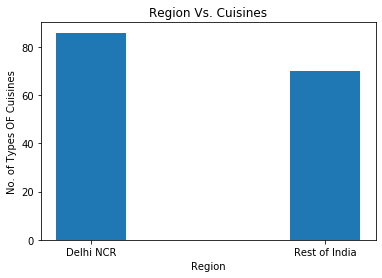

In [158]:
### plotting region against no. of types of cuisines served in that region
no_of_types_cuisines=[len(cuisines_delhi),len(cuisines_rest_india)]
region=["Delhi NCR","Rest of India"]

plt.bar(region,no_of_types_cuisines,width=0.3)
plt.xlabel("Region")
plt.ylabel("No. of Types OF Cuisines")
plt.title("Region Vs. Cuisines")
plt.show()

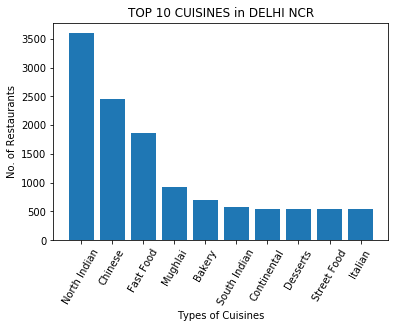

In [159]:
## for delhi types of cuisines
## plotting types of cuisines against number of restaurants serving that cuisine
top_cuisines_ncr=np.array(top_cuisines_ncr)
top_cuisines_india=np.array(top_cuisines_india)
count_cuisines_ncr=np.array(top_cuisines_ncr[:,1],dtype=int)
plt.bar(top_cuisines_ncr[:,0],count_cuisines_ncr)
plt.xticks(rotation=60)
plt.xlabel("Types of Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("TOP 10 CUISINES in DELHI NCR")
plt.show()

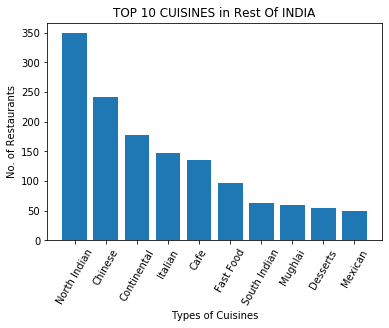

In [15]:
## for REST OF INDIA types of cuisines
## plotting types of cuisines against number of restaurants serving that cuisine

count_cuisines_india=np.array(top_cuisines_india[:,1],dtype=int)
plt.bar(top_cuisines_india[:,0],count_cuisines_india)
plt.xticks(rotation=60)
plt.xlabel("Types of Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("TOP 10 CUISINES in Rest Of INDIA")
plt.show()

## 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

## 2.1 Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

### 2.1.1 Number of Votes given Restaurant

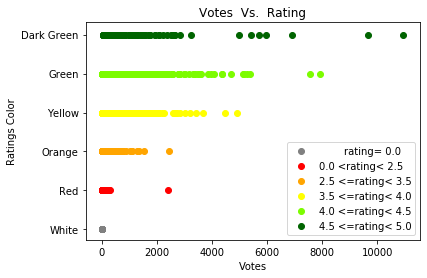

In [160]:
## plotting votes against Rating color
plt.scatter(df[df["Rating color"]=="White"].Votes,df[df["Rating color"]=="White"]["Rating color"],c="grey",label="        rating= 0.0")
plt.scatter(df[df["Rating color"]=="Red"].Votes,df[df["Rating color"]=="Red"]["Rating color"],c="red",label="0.0 <rating< 2.5")
plt.scatter(df[df["Rating color"]=="Orange"].Votes,df[df["Rating color"]=="Orange"]["Rating color"],c="Orange",label="2.5 <=rating< 3.5")

plt.scatter(df[df["Rating color"]=="Yellow"].Votes,df[df["Rating color"]=="Yellow"]["Rating color"],c="yellow",label="3.5 <=rating< 4.0")
plt.scatter(df[df["Rating color"]=="Green"].Votes,df[df["Rating color"]=="Green"]["Rating color"],c="lawngreen",label="4.0 <=rating< 4.5")
plt.scatter(df[df["Rating color"]=="Dark Green"].Votes,df[df["Rating color"]=="Dark Green"]["Rating color"],c="darkgreen",label="4.5 <=rating< 5.0")
plt.legend()
plt.xlabel("Votes")
plt.ylabel("Ratings Color")
plt.title("Votes  Vs.  Rating")
plt.show()


### 2.1.2 Restaurant serving more number of cuisines.

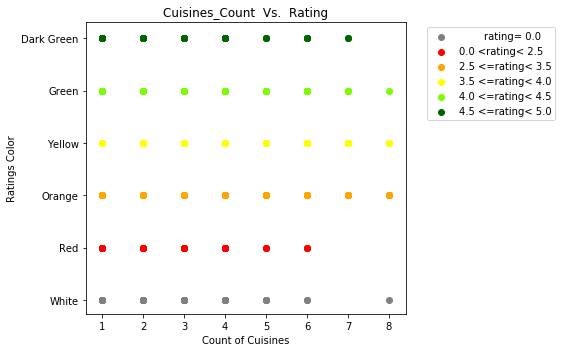

In [161]:
## getting count of cuisines for each row of dataset
def get_count(cuisines):
    l=len(cuisines.split(","))
    return l
new_df=df.copy()
Count_Cuisines=df["Cuisines"].copy()

Count_Cuisines=Count_Cuisines.apply(get_count)
     
new_df["Count_Cuisines"]=Count_Cuisines
    
## plotting count of cuisines against Rating Color
plt.figure(figsize=(8,5))
plt.scatter(new_df[new_df["Rating color"]=="White"].Count_Cuisines,new_df[new_df["Rating color"]=="White"]["Rating color"],c="grey",label="        rating= 0.0")
plt.scatter(new_df[new_df["Rating color"]=="Red"].Count_Cuisines,new_df[new_df["Rating color"]=="Red"]["Rating color"],c="red",label="0.0 <rating< 2.5")
plt.scatter(new_df[new_df["Rating color"]=="Orange"].Count_Cuisines,new_df[new_df["Rating color"]=="Orange"]["Rating color"],c="Orange",label="2.5 <=rating< 3.5")

plt.scatter(new_df[new_df["Rating color"]=="Yellow"].Count_Cuisines,new_df[new_df["Rating color"]=="Yellow"]["Rating color"],c="yellow",label="3.5 <=rating< 4.0")
plt.scatter(new_df[new_df["Rating color"]=="Green"].Count_Cuisines,new_df[new_df["Rating color"]=="Green"]["Rating color"],c="lawngreen",label="4.0 <=rating< 4.5")
plt.scatter(new_df[new_df["Rating color"]=="Dark Green"].Count_Cuisines,new_df[new_df["Rating color"]=="Dark Green"]["Rating color"],c="darkgreen",label="4.5 <=rating< 5.0")

plt.legend(bbox_to_anchor=(1.05, 1.0),loc="best")
plt.xlabel("Count of Cuisines")
plt.ylabel("Ratings Color")
plt.title("Cuisines_Count  Vs.  Rating")
plt.tight_layout()
plt.show()
    

### 2.1.3 Average Cost of Restaurant

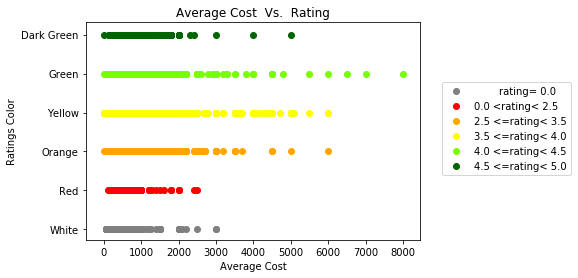

In [162]:
## plotting votes against Rating color
plt.scatter(df[df["Rating color"]=="White"]["Average Cost for two"],df[df["Rating color"]=="White"]["Rating color"],c="grey",label="        rating= 0.0")
plt.scatter(df[df["Rating color"]=="Red"]["Average Cost for two"],df[df["Rating color"]=="Red"]["Rating color"],c="red",label="0.0 <rating< 2.5")
plt.scatter(df[df["Rating color"]=="Orange"]["Average Cost for two"],df[df["Rating color"]=="Orange"]["Rating color"],c="Orange",label="2.5 <=rating< 3.5")

plt.scatter(df[df["Rating color"]=="Yellow"]["Average Cost for two"],df[df["Rating color"]=="Yellow"]["Rating color"],c="yellow",label="3.5 <=rating< 4.0")
plt.scatter(df[df["Rating color"]=="Green"]["Average Cost for two"],df[df["Rating color"]=="Green"]["Rating color"],c="lawngreen",label="4.0 <=rating< 4.5")
plt.scatter(df[df["Rating color"]=="Dark Green"]["Average Cost for two"],df[df["Rating color"]=="Dark Green"]["Rating color"],c="darkgreen",label="4.5 <=rating< 5.0")
plt.legend(bbox_to_anchor=(1.05, 0.75))
plt.xlabel("Average Cost")
plt.ylabel("Ratings Color")
plt.title("Average Cost  Vs.  Rating")
plt.show()


### 2.1.4 Restaurant serving some specific cuisines.

In [183]:
### finding average rating of all restaurants serving specific cuisines
## Restaurants that have zero rating on an average are dropped
Cuisines=df.copy()
def get_list(s):
    s=s.split(",")
    l=[]
    for i in s:
        l.append(i.strip())
    return l
Cuisines["Cuisines"]=Cuisines["Cuisines"].apply(get_list)
Cuisines.reset_index(drop=True,inplace=True)

l=[]
for row in Cuisines.values:
    for j in row[9]:
        l.append([row[17],j.strip()])
    
specific_cuisines=pd.DataFrame(l)
specific_cuisines.columns=["Rating","Cuisines"]

groups=specific_cuisines.groupby("Cuisines")

final_list=[]

for key,group in groups:
    if group["Rating"].mean()!=0.0:
        final_list.append([format(group["Rating"].mean(),".2f"),key])

final_list=np.array(final_list)
x=np.array(final_list[:,1])
y=np.array(final_list[:,0],dtype=float)
ind_min=y.argmin()
ind_max=y.argmax()
print(x[ind_min],x[ind_max])

Armenian Persian


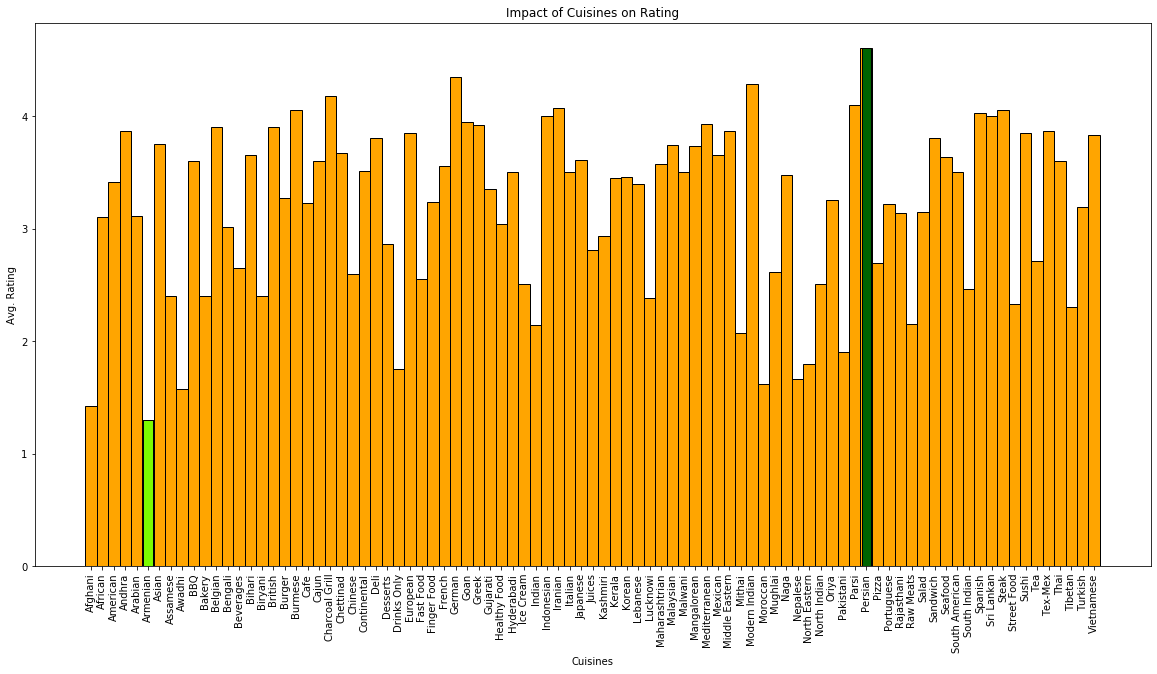

In [185]:
### plotting specific cuisine against average rating
plt.figure(figsize=(20,10))
plt.bar(x,y,width=1,edgecolor="black",color="orange")
plt.bar(x[ind_min],y.min(),color="lawngreen",edgecolor="black")
plt.bar(x[ind_max],y.max(),color="darkgreen",edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel("Cuisines")
plt.ylabel("Avg. Rating")
plt.title("Impact of Cuisines on Rating")
plt.show()

## 2.2 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

### 2.2.1 Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [165]:
## finding weighted rating of restaurants in diffrent localities
## grouping dataset based on Locality
g=df.groupby("Locality")
ans=[]
for keys,group in g:
    ans.append([((group["Aggregate rating"]*group["Votes"]).sum())/(group["Votes"].sum()),keys.strip()])

weighted=pd.DataFrame(sorted(ans,reverse=True))
weighted.dropna(inplace=True)
weighted.reset_index(drop=True,inplace=True)

for i in range(10):
    print(weighted.values[i][1],weighted.values[i][0])
#### warning is due to zerodivison that might be possible, but that will print nan and we will drop

/home/vishesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Aminabad 4.9
Friends Colony 4.886916367367881
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Sector 5, Salt Lake 4.707022552098202
Chittoor Road 4.6
Arambol 4.6
Marathahalli 4.57508238276299
Anjuna 4.5446681580909765
Ellis Bridge 4.438470451911935


## Visualization

### 3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

In [166]:
## considering same name restaurants at different places to be as one restaurants,

## for example if KFC is present in different states , then we consider this to be as one becuse restaurant is same!

## finding restaurants along with number of cuisines served in that restarants all over the country
grouping=df.groupby("Restaurant Name")

ans=[]

for key,group in grouping:
    
    distinct_cuisines=set()
    
    for i in group["Cuisines"].values:
        l=i.split(",")
        
        for j in l:
            distinct_cuisines.add(j.strip())
            
    ans.append([len(distinct_cuisines),key.strip()])
    
ans=sorted(ans,reverse=True)



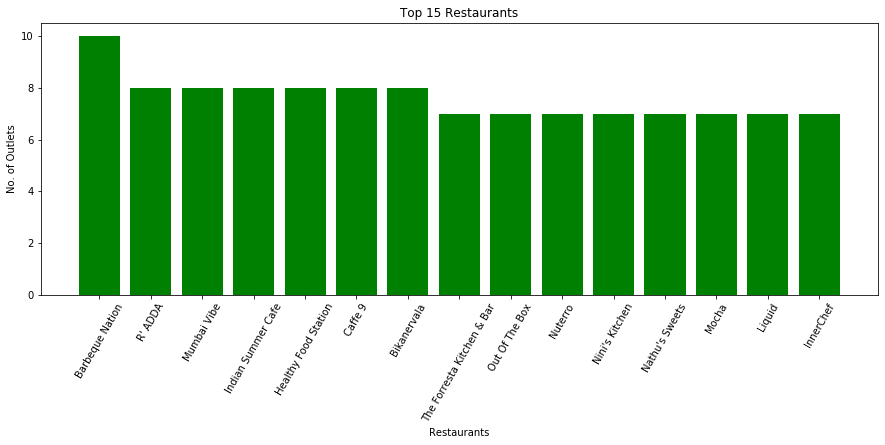

In [115]:
## while plotting bar graph for first 15, some restaurants have same outlets as of 15th number are to be rejected

## as question says for top 15

## plotting restaurants against number of cuisines served in that restaurant

x=[]
y=[]

for row in ans:
    x.append(row[1])
    y.append(row[0])

plt.figure(figsize=(15,5))
plt.bar(x[0:15],y[0:15],color="green")
plt.xticks(rotation=60)
plt.xlabel("Restaurants")
plt.ylabel("No. of Outlets")
plt.title("Top 15 Restaurants")
plt.show()


### 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

808


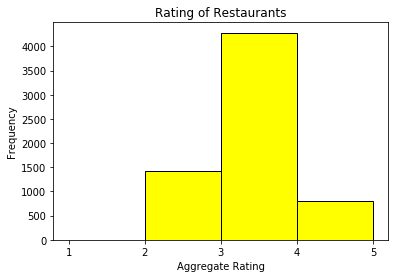

In [167]:
## unrated means restaurants with rating 0.0 are  to be dropped
##plotting frequency of ratings
l=[i for i in range(1,6)]
plt.hist(df["Aggregate rating"],edgecolor="black",color="yellow",bins=l)
plt.xticks(l)
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.title("Rating of Restaurants")
print((len(df[(df["Aggregate rating"]>=4)&(df["Aggregate rating"]<=5)])))
plt.show()

### 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

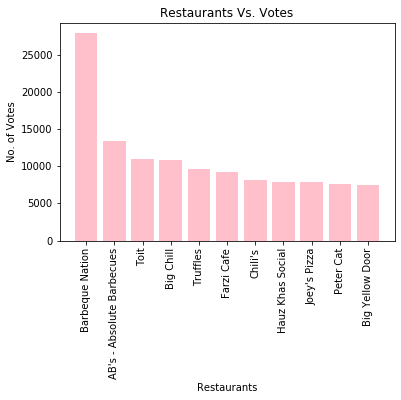

[[27835, 'Barbeque Nation'], [13400, "AB's - Absolute Barbecues"], [10934, 'Toit'], [10853, 'Big Chill'], [9682, 'Truffles'], [9189, 'Farzi Cafe'], [8156, "Chili's"], [7931, 'Hauz Khas Social'], [7807, "Joey's Pizza"], [7574, 'Peter Cat']]


In [168]:
## plotting restaurants against number of votes

## RESTAURANT NAME CAN BE SAME , BUT THEY MAY BE AT DIFFERENT LOCATION,BUT VOTES COUNT HAS TO ADDED
## becoz we are looking distinct restaurants ,considering same restaurants at different locations as same.
votes_res={}
for i in df.values:
    votes_res[i[1].strip()]=votes_res.get(i[1].strip(),0)+i[20] 
    
list_res=[]
for i in votes_res:
    list_res.append([votes_res[i],i])
x=[]
y=[]
list_res=sorted(list_res,reverse=True)
for i in range(11):
    x.append(list_res[i][1].strip())
    y.append(list_res[i][0])
plt.bar(x,y,color="pink")
plt.xticks(rotation=90)
plt.xlabel("Restaurants")
plt.ylabel("No. of Votes")
plt.title("Restaurants Vs. Votes")
plt.show()
print(list_res[:10])


### 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

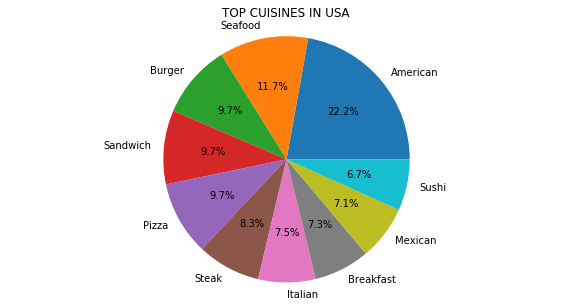

['American' 'Seafood' 'Burger' 'Sandwich' 'Pizza' 'Steak' 'Italian'
 'Breakfast' 'Mexican' 'Sushi']
[112  59  49  49  49  42  38  37  36  34]


In [176]:
## plotting pie graph of number of different types of Cuisines served in USA
data_usa=data[data["Country Code"]==216]

cuisines=data_usa["Cuisines"].copy()
cuisines.dropna(inplace=True)
cuisines.reset_index(drop=True,inplace=True)
cuisines
usa_cuisines=[]
for i in cuisines.values:
    l=i.split(",")
    for j in l:
        usa_cuisines.append(j.strip())
unique_cuisines, counts=np.unique(usa_cuisines,return_counts=True)

# SORTING

index=counts.argsort()
sorted_counts=counts[index]
unique_cuisines=unique_cuisines[index]
x=unique_cuisines[(len(counts)-1):(len(counts)-11):-1]
y=sorted_counts[(len(counts)-1):(len(counts)-11):-1]
plt.figure(figsize=(10,5))
plt.pie(y,labels=x,autopct="%.1f%%")
plt.axis("equal")
plt.title("TOP CUISINES IN USA")
plt.show()

print(x)
print(y)

### 3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

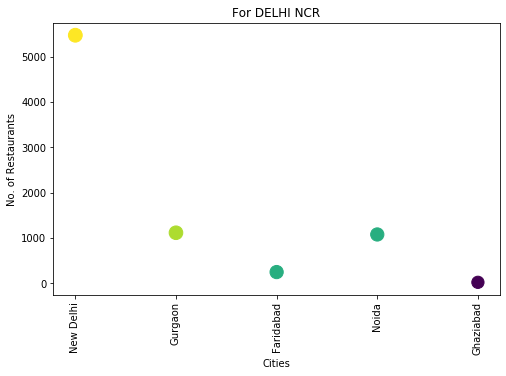

In [177]:
## plotting cities against number of restaurants
##Since given Dataset is skewed towards Delhi NCR, 
##therefore I plotted graphs separately for Delhi NCR and Rest of India.
g=res_delhi.groupby("City")

list_ans=[]


for keys,group in g:
    list_ans.append([((group["Aggregate rating"]*group["Votes"]).sum())/(group["Votes"].sum()),keys.strip(),len(group)])
     
weighted=pd.DataFrame(sorted(list_ans,reverse=True))
weighted.dropna(inplace=True)
weighted.reset_index(drop=True,inplace=True)
 
    ## weighted ratings are multiplied by 50 so that we can see difference in bubble graph,
    # otherwise size would be very small ,becoz want to draw insights not exact decimal representation
sizes=[]
for i in weighted.values[:,0]:
    
    sizes.append(float(format(i,"0.1f"))*50)
    
    
cities=weighted.values[:,1]
count_res=weighted.values[:,2]

plt.figure(figsize=(8,5))

plt.scatter(cities,count_res,s=sizes,c=sizes)
plt.xticks(rotation=90)
plt.xlabel("Cities")
plt.ylabel("No. of Restaurants")
plt.title("For DELHI NCR")
plt.show()

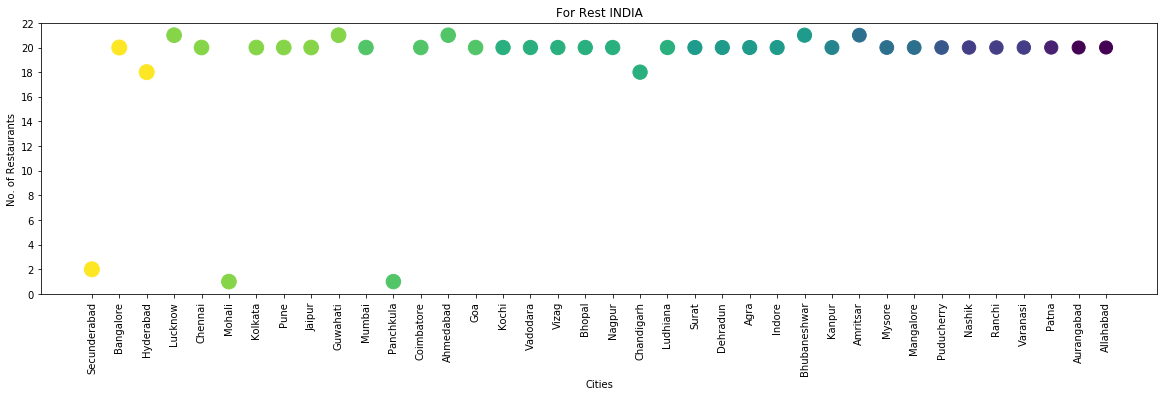

In [117]:
#### gouping data on the basis of city

g=res_rest_india.groupby("City")

list_ans=[]


for keys,group in g:
    list_ans.append([((group["Aggregate rating"]*group["Votes"]).sum())/(group["Votes"].sum()),keys.strip(),len(group)])
     
weighted=pd.DataFrame(sorted(list_ans,reverse=True))
weighted.dropna(inplace=True)
weighted.reset_index(drop=True,inplace=True)
 
    ## weighted ratings are multiplied by 50 so that we can see difference in bubble graph,
    # otherwise size would be very small ,becoz want to draw insights not exact decimal representation
sizes=[]
for i in weighted.values[:,0]:
    
    sizes.append(float(format(i,"0.1f"))*50)
    
    
cities=weighted.values[:,1]

count_res=weighted.values[:,2]

## plotting cities against number of restaurants

plt.figure(figsize=(20,5))

plt.scatter(cities,count_res,s=sizes,c=sizes)
plt.xticks(rotation=90)
plt.xlabel("Cities")
plt.yticks(range(0,24,2))
plt.ylabel("No. of Restaurants")
plt.title("For Rest INDIA")
plt.show()